## Importing the required libraries

In [1]:
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Initializing the path

In [2]:
train_path=('E:/Project for Portfolio/Brain Tumour detection/brain_tumor_dataset/Train')
test_path=('E:/Project for Portfolio/Brain Tumour detection/brain_tumor_dataset/Test')

## Model building

In [3]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

## Train-test Split

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 213 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'no': 0, 'yes': 1}

In [8]:
test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 40 images belonging to 2 classes.


## Training the model

In [23]:
hist = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = test_dataset
)

Epoch 1/30
7/7 [==============================] - 49s 7s/step - loss: 0.5935 - accuracy: 0.7230 - val_loss: 0.5968 - val_accuracy: 0.6750
Epoch 2/30
7/7 [==============================] - 48s 7s/step - loss: 0.5848 - accuracy: 0.7230 - val_loss: 0.5856 - val_accuracy: 0.6750
Epoch 3/30
7/7 [==============================] - 48s 7s/step - loss: 0.5696 - accuracy: 0.7324 - val_loss: 0.5869 - val_accuracy: 0.6750
Epoch 4/30
7/7 [==============================] - 48s 7s/step - loss: 0.5562 - accuracy: 0.7277 - val_loss: 0.5471 - val_accuracy: 0.7500
Epoch 5/30
7/7 [==============================] - 49s 7s/step - loss: 0.5384 - accuracy: 0.7700 - val_loss: 0.5212 - val_accuracy: 0.7500
Epoch 6/30
7/7 [==============================] - 50s 7s/step - loss: 0.5238 - accuracy: 0.7653 - val_loss: 0.5396 - val_accuracy: 0.7750
Epoch 7/30
7/7 [==============================] - 49s 7s/step - loss: 0.5397 - accuracy: 0.7324 - val_loss: 0.5996 - val_accuracy: 0.6750
Epoch 8/30
7/7 [==================

In [24]:
model.save('model.h5')

In [25]:
from tensorflow.keras.preprocessing.image import load_img

## Testing the model

In [64]:
img=image.load_img('E:/Project for Portfolio/Brain Tumour detection/brain_tumor_dataset/Test/no/3 no.jpg',target_size=(224,224))

In [65]:
x=image.img_to_array(img)
x=x/255

In [66]:
x=np.expand_dims(x,axis=0)

In [67]:
pred=model.predict(x)

In [68]:
pred[0][0]

0.05116403

In [69]:
if pred[0][0] < 0.5:
    print('No tumor detected')
else:
    print('Tumor Detected')

No tumor detected


## Accuracy of model

In [71]:
model.evaluate_generator(test_dataset)[1]

0.875

In [77]:
history=hist.history.keys()

Text(0.5, 1.0, 'Accuracy Curves')

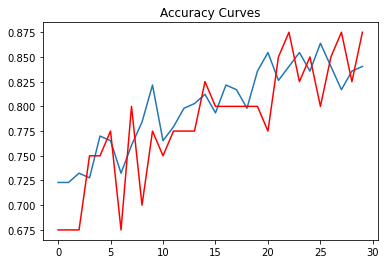

In [84]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'],color='red')
plt.title('Accuracy Curves')

Text(0.5, 1.0, 'Loss Curves')

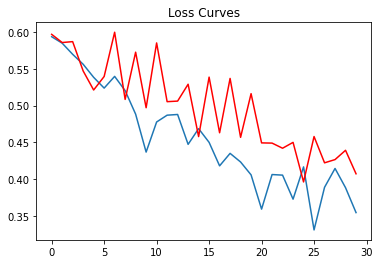

In [85]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],color='red')
plt.title('Loss Curves')